Project #2 Titanic Data Analysis
Question: What variables made it more likley for passengers to survive the sinking of the Tiatanic? 
Passenger Class? Age? I will particularly look at whether the age old adage "women and children first" held true and affected whether people survived or not. In addition I will atempt to correlate this with whether the wealthy were given preferential treatment when it came to the decision on who to save. 

In [37]:
import pandas as pd


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#Code to import the dataframes
train_df = pd.read_csv('train.csv')

In [40]:
gender_submissions_df = pd.read_csv('gender_submission.csv')

In [41]:
test_df = pd.read_csv('test.csv')

In [42]:
#Code to fix and merge the multiple csv files given to us. Resulting in a fixed one: titanic_db
new_df = test_df.merge(gender_submissions_df, on='PassengerId', how = 'inner')

In [43]:
titanic_df = train_df.append(new_df)

In [44]:
titanic_df

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1,237736


In [69]:
bins = [0 , 10 , 20 , 30, 40 , 50 , 60 ,70 ,80]
group_names = ['Adolescents', 'Teen', 'Twenties', 'Thirties', 'Forties', 'Fifties', 'Sixties', 'Seventies']
age_groups = pd.cut(titanic_df['Age'], bins, labels=group_names)
titanic_df['age_groups'] = pd.cut(titanic_df['Age'], bins, labels=group_names)


0         Twenties
1         Thirties
2         Twenties
3         Thirties
4         Thirties
5              NaN
6          Fifties
7      Adolescents
8         Twenties
9             Teen
10     Adolescents
11         Fifties
12            Teen
13        Thirties
14            Teen
15         Fifties
16     Adolescents
17             NaN
18        Thirties
19             NaN
20        Thirties
21        Thirties
22            Teen
23        Twenties
24     Adolescents
25        Thirties
26             NaN
27            Teen
28             NaN
29             NaN
          ...     
388       Twenties
389    Adolescents
390       Twenties
391        Fifties
392           Teen
393        Forties
394       Twenties
395           Teen
396       Twenties
397        Forties
398       Twenties
399       Thirties
400       Twenties
401       Thirties
402       Twenties
403           Teen
404        Forties
405           Teen
406       Twenties
407        Forties
408            NaN
409    Adole

In [ ]:
titanic_df.isnull().sum()

The data frame above was created through combining several csv files into one, eventually getting the whole dataset. Age has a few values where the value age was not given and thus a NaN is used as a placeholder instead. I chose to leave these values in as it would skew the number of people who survived the ordeal and may interfere with my analysis when it comes to Pclass survial and Women survival rate. I will note that age survial rate may be a bias due to the missing variables. There were 263 of them. These will lead to gaps in my analysis when creating graphs as pandas acknowledge this as bad data. Usually in graphs the NANs would result in gaps when using matplotlib. 

In [46]:
#Did some basic commands in order to understand the data a little bit better. 
titanic_df.sum(axis = 0)

Age             31255.6700
Fare            43550.4869
Parch             504.0000
PassengerId    857395.0000
Pclass           3004.0000
SibSp             653.0000
Survived          494.0000
dtype: float64

In [47]:

titanic_df.mean(axis = 0)

Age             29.881138
Fare            33.295479
Parch            0.385027
PassengerId    655.000000
Pclass           2.294882
SibSp            0.498854
Survived         0.377387
dtype: float64

In [94]:
#After fidning out interesting facts about the data. Decided to focus on survival as my main variable
mean_age_of_survival = titanic_df.groupby('age_groups').mean()['Survived']

In [49]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


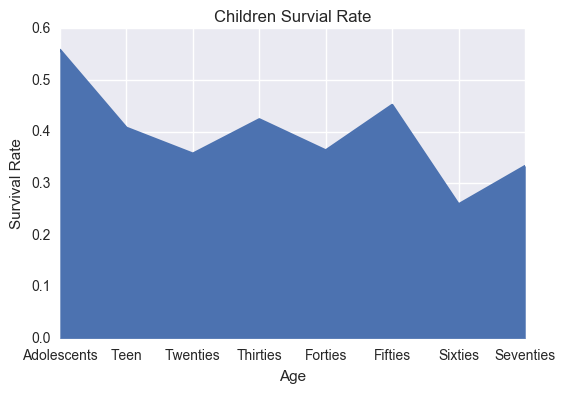

In [95]:
mean_age_survivals = mean_age_of_survival.plot(kind='area')
mean_age_survivals.set_ylabel("Survival Rate")
mean_age_survivals.set_xlabel("Age")
plt.title("Children Survial Rate")



In [51]:
def correlation(x, y):
    std_x = (x - x.mean()) / x.std(ddof = 0)
    std_y = (y - y.mean()) / y.std(ddof = 0)
    
    return (std_x * std_y).mean() 

correlation(titanic_df['Survived'], titanic_df['Age'])


-0.0542363618011969

Based on the skew of the graph and the correlation give to use through the use of an equation we can see that the older you were had a negative effect on whether or not you survive. With adolecsents having the highest survival rate of the bunch. Thus, giving credence to the adage "Women and Children first"

In [52]:
count_titanic = titanic_df.count()
number_of_entries = count_titanic.max()

In [53]:
titanic_df.groupby('Pclass',).mean()['Survived']

Pclass
1    0.575851
2    0.422383
3    0.269394
Name: Survived, dtype: float64

In [54]:
titanic_class_survival_means = titanic_df.groupby('Pclass',).mean()['Survived']

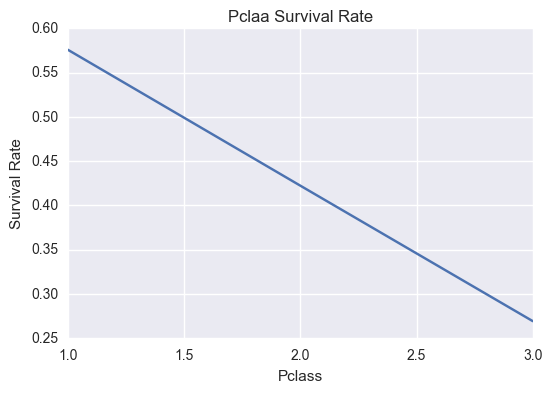

In [55]:
plot_titanic_survival = titanic_class_survival_means.plot()
plot_titanic_survival.set_ylabel("Survival Rate")
plt.title("Pclaa Survival Rate")

The graph above shows that there is a negative relationship with a higher pclass and your survival rate furing the crash. Thus we can assume that it was more likely that people with higher class tickets would survive over lower class ones. Why was this? If my preditcions are correct it will be due to the fact that more women were in higher classes (pclass one and two) than the lower one.

In [56]:
survived_mean = titanic_df['Survived'].mean()

In [57]:

correlation(titanic_df['Survived'], titanic_df['Pclass'])

-0.2647102628338704

In [58]:
#The value above shows that the lower class cabins were more likely to not survive the ordeal. With statistical Calculaitons

In [59]:
correlation(titanic_df['Survived'], titanic_df['Fare'])

0.23365755561758214

This value does once again compares the correlation between survived and the far they paid. The more that they paid, most likely for a higher class ticket, the more likley they survived. Hence, it further backs up the claim that higher clss tickets made it more likely for people to survive the ordeal. 

After my analyis of the data given to my by the mulptiple csv files I can confidently say that the more that you spent on your cabin (i.e. nicer Passenger Cabin) were more likely to survive. In addition the skew of the graph in which children were more likely to survive displays the idea of children first when attempting to save the passnegers. Now I want to analyze why this was a factor.

In [60]:
sex_survival = titanic_df.groupby('Sex').sum()['Survived']

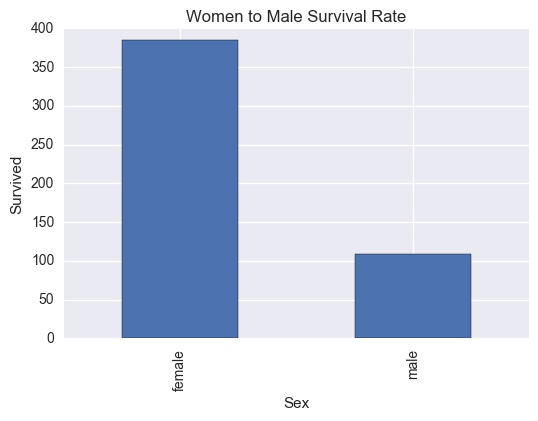

In [61]:
Sex_survivals = sex_survival.plot(kind = 'bar')
Sex_survivals.set_ylabel('Survived')
plt.title("Women to Male Survival Rate")

Here we can see that females overall survived more than men did. This creates the question: Were there more women in nicer Passenger Classes and is this the reason why they had a greater chance at survival. 

In [62]:
#replaced the strings for 'sex' with 1 for female and 0 for proper analysis
new_df = titanic_df.replace({'female': 1, 'male': 0})

In [63]:
sum_women_class = new_df.groupby('Pclass').sum()['Sex']

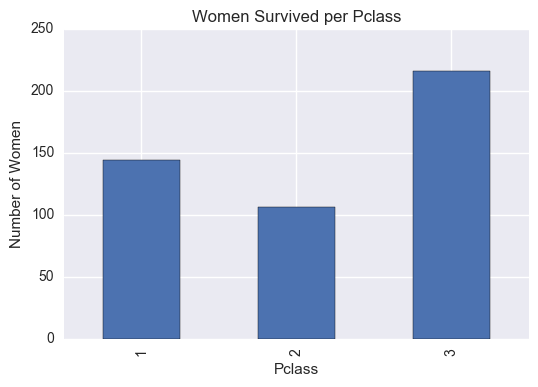

In [64]:
woman_class = sum_women_class.plot(kind = 'bar')
woman_class.set_ylabel('Number of Women')
plt.title("Women Survived per Pclass")

As you can see in this graph women were there were more women in class 3. This makes it unlikely women were the factor that made 1st class more likley to survive. However, if women were a greater portion of class one than three then it could still affect it. However women consisted more of first and second class around 50% of there total populations. This most likley led to an increase in survival rate due to the fact that women were often saved first over men. 

# Potential Bias
One thing that we must be wary of when looking at these results is that these were gathered before the advent of computers and electornic ledgers. Which means that there is room for human error. In addition people who snuck on board would not be recorded and thus not influence my results. 

# Conclusion
After my analysis I was able to answer if the old adage of "women and children first" was prevalent in the sinking of the titanic. I found that this was true accroding to the data given to us. Women and children were more likley to live when compared men. This helped influence the surivival rate of higher passenger classes due to the fact that these classes consisted of more women per men. This resulted in the survival rate of pclasses 1 and 2 being higher than three and making it seem as if the people who spent more were more likley to survive. However, based of my analysis it came down to sex and age. 